In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import nltk
from nltk.classify import NaiveBayesClassifier
from nltk.corpus import subjectivity
from nltk.sentiment import SentimentAnalyzer
from nltk.sentiment.util import *
from nltk.corpus import stopwords
from nltk.classify import SklearnClassifier
nltk.download('subjectivity')
nltk.download('punkt')
nltk.download('vader_lexicon')
from wordcloud import WordCloud,STOPWORDS
import matplotlib.pyplot as plt
import os
from subprocess import check_output

[nltk_data] Downloading package subjectivity to /root/nltk_data...
[nltk_data]   Package subjectivity is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [ ]:
n_instances = 500
subj_docs = [(sent, 'subj') for sent in subjectivity.sents(categories='subj')[:n_instances]]
obj_docs = [(sent, 'obj') for sent in subjectivity.sents(categories='obj')[:n_instances]]
len(subj_docs), len(obj_docs)
#output should be (100, 100)
#numero de instancias totales (5000,5000)

(500, 500)

In [ ]:
n_instances_val = [100,500,1000,2000,5000]
for val in n_instances_val:
  n_instances = val
  subj_docs = [(sent, 'subj') for sent in subjectivity.sents(categories='subj')[:n_instances]]
  obj_docs = [(sent, 'obj') for sent in subjectivity.sents(categories='obj')[:n_instances]]

  num_entrenamiento = int(val * 0.8)
  num_prueba = val - num_entrenamiento

  train_subj_docs = subj_docs[:num_entrenamiento]
  test_subj_docs = subj_docs[num_entrenamiento:]
  train_obj_docs = obj_docs[:num_entrenamiento]
  test_obj_docs = obj_docs[num_entrenamiento:]
  training_docs = train_subj_docs+train_obj_docs
  testing_docs = test_subj_docs+test_obj_docs

  sentim_analyzer = SentimentAnalyzer()
  all_words_neg = sentim_analyzer.all_words([mark_negation(doc) for doc in training_docs])

  unigram_feats = sentim_analyzer.unigram_word_feats(all_words_neg, min_freq=1)

  sentim_analyzer.add_feat_extractor(extract_unigram_feats, unigrams=unigram_feats)

  training_set = sentim_analyzer.apply_features(training_docs)
  test_set = sentim_analyzer.apply_features(testing_docs)

  trainer = NaiveBayesClassifier.train
  classifier = sentim_analyzer.train(trainer, training_set)

  for key,value in sorted(sentim_analyzer.evaluate(test_set).items()):
    print('{0}: {1}'.format(key, value))

  print()

Training classifier
Evaluating NaiveBayesClassifier results...
Accuracy: 0.85
F-measure [obj]: 0.8421052631578947
F-measure [subj]: 0.8571428571428572
Precision [obj]: 0.8888888888888888
Precision [subj]: 0.8181818181818182
Recall [obj]: 0.8
Recall [subj]: 0.9

Training classifier
Evaluating NaiveBayesClassifier results...
Accuracy: 0.92
F-measure [obj]: 0.92
F-measure [subj]: 0.92
Precision [obj]: 0.92
Precision [subj]: 0.92
Recall [obj]: 0.92
Recall [subj]: 0.92

Training classifier
Evaluating NaiveBayesClassifier results...
Accuracy: 0.865
F-measure [obj]: 0.8556149732620321
F-measure [subj]: 0.8732394366197184
Precision [obj]: 0.9195402298850575
Precision [subj]: 0.8230088495575221
Recall [obj]: 0.8
Recall [subj]: 0.93

Training classifier
Evaluating NaiveBayesClassifier results...
Accuracy: 0.9
F-measure [obj]: 0.8950131233595802
F-measure [subj]: 0.9045346062052505
Precision [obj]: 0.9419889502762431
Precision [subj]: 0.865296803652968
Recall [obj]: 0.8525
Recall [subj]: 0.9475



In [ ]:
subj_docs[0]
# Output should be: (['smart', 'and', 'alert', ',', 'thirteen', 'conversations', 'about', 'one',
# 'thing', 'is', 'a', 'small', 'gem', '.'], 'subj')

(['smart',
  'and',
  'alert',
  ',',
  'thirteen',
  'conversations',
  'about',
  'one',
  'thing',
  'is',
  'a',
  'small',
  'gem',
  '.'],
 'subj')

In [ ]:
num_entrenamiento = int(500 * 0.8)
train_subj_docs = subj_docs[:num_entrenamiento]
test_subj_docs = subj_docs[num_entrenamiento:]
train_obj_docs = obj_docs[:num_entrenamiento]
test_obj_docs = obj_docs[num_entrenamiento:]
training_docs = train_subj_docs+train_obj_docs
testing_docs = test_subj_docs+test_obj_docs

In [ ]:
sentim_analyzer = SentimentAnalyzer()
all_words_neg = sentim_analyzer.all_words([mark_negation(doc) for doc in training_docs])

unigram_feats = sentim_analyzer.unigram_word_feats(all_words_neg, min_freq=1)
len(unigram_feats)
# output: 83

1684

In [ ]:
sentim_analyzer.add_feat_extractor(extract_unigram_feats, unigrams=unigram_feats)

training_set = sentim_analyzer.apply_features(training_docs)
test_set = sentim_analyzer.apply_features(testing_docs)

trainer = NaiveBayesClassifier.train
classifier = sentim_analyzer.train(trainer, training_set)
# output: Training classifier

Training classifier


In [ ]:
for key,value in sorted(sentim_analyzer.evaluate(test_set).items()):
    print('{0}: {1}'.format(key, value))
#Outputs:
#Evaluating NaiveBayesClassifier results...
#Accuracy: 0.8

#F-measure [obj]: 0.8
#F-measure [subj]: 0.8
#Precision [obj]: 0.8
#Precision [subj]: 0.8
#Recall [obj]: 0.8
#Recall [subj]: 0.8

Evaluating NaiveBayesClassifier results...
Accuracy: 0.92
F-measure [obj]: 0.92
F-measure [subj]: 0.92
Precision [obj]: 0.92
Precision [subj]: 0.92
Recall [obj]: 0.92
Recall [subj]: 0.92


# Probar con min_freq

In [ ]:
min_freq_val = [1,2,3,4,5]
for val in min_freq_val:
  sentim_analyzer = SentimentAnalyzer()
  all_words_neg = sentim_analyzer.all_words([mark_negation(doc) for doc in training_docs])
  unigram_feats = sentim_analyzer.unigram_word_feats(all_words_neg, min_freq=val)
  sentim_analyzer.add_feat_extractor(extract_unigram_feats, unigrams=unigram_feats)
  training_set = sentim_analyzer.apply_features(training_docs)
  test_set = sentim_analyzer.apply_features(testing_docs)

  trainer = NaiveBayesClassifier.train
  classifier = sentim_analyzer.train(trainer, training_set)
  print(f'Resultado con un min_freq de:{val}')
  for key,value in sorted(sentim_analyzer.evaluate(test_set).items()):
    print('{0}: {1}'.format(key, value))
  print()
  print()
# El mejor resultado es con un min_freq de 1

Training classifier
Resultado con un min_freq de:1
Evaluating NaiveBayesClassifier results...
Accuracy: 0.85
F-measure [obj]: 0.8421052631578947
F-measure [subj]: 0.8571428571428572
Precision [obj]: 0.8888888888888888
Precision [subj]: 0.8181818181818182
Recall [obj]: 0.8
Recall [subj]: 0.9


Training classifier
Resultado con un min_freq de:2
Evaluating NaiveBayesClassifier results...
Accuracy: 0.85
F-measure [obj]: 0.8333333333333334
F-measure [subj]: 0.8636363636363636
Precision [obj]: 0.9375
Precision [subj]: 0.7916666666666666
Recall [obj]: 0.75
Recall [subj]: 0.95


Training classifier
Resultado con un min_freq de:3
Evaluating NaiveBayesClassifier results...
Accuracy: 0.8
F-measure [obj]: 0.7894736842105263
F-measure [subj]: 0.8095238095238095
Precision [obj]: 0.8333333333333334
Precision [subj]: 0.7727272727272727
Recall [obj]: 0.75
Recall [subj]: 0.85


Training classifier
Resultado con un min_freq de:4
Evaluating NaiveBayesClassifier results...
Accuracy: 0.8
F-measure [obj]: 0.

# Segunda parte

In [ ]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sentences = ["VADER is smart, handsome, and funny.", # positive sentence example
   "VADER is smart, handsome, and funny!", # punctuation emphasis handled correctly (sentiment intensity adjusted)
   "VADER is very smart, handsome, and funny.",  # booster words handled correctly (sentiment intensity adjusted)
   "VADER is VERY SMART, handsome, and FUNNY.",  # emphasis for ALLCAPS handled
   "VADER is VERY SMART, handsome, and FUNNY!!!",# combination of signals - VADER appropriately adjusts intensity
   "VADER is VERY SMART, really handsome, and INCREDIBLY FUNNY!!!",# booster words & punctuation make this close to ceiling for score
   "The book was good.",         # positive sentence
   "The book was kind of good.", # qualified positive sentence is handled correctly (intensity adjusted)
   "The plot was good, but the characters are uncompelling and the dialog is not great.", # mixed negation sentence
   "A really bad, horrible book.",       # negative sentence with booster words
   "At least it isn't a horrible book.", # negated negative sentence with contraction
   ":) and :D",     # emoticons handled
   "",              # an empty string is correctly handled
   "Today sux",     #  negative slang handled
   "Today sux!",    #  negative slang with punctuation emphasis handled
   "Today SUX!",    #  negative slang with capitalization emphasis
   "Today kinda sux! But I'll get by, lol" # mixed sentiment example with slang and constrastive conjunction "but"
]

In [ ]:
tricky_sentences = [
    "Most automated sentiment analysis tools are shit.",
    "VADER sentiment analysis is the shit.",
    "Sentiment analysis has never been good.",
    "Sentiment analysis with VADER has never been this good.",
    "Warren Beatty has never been so entertaining.",
    "I won't say that the movie is astounding and I wouldn't claim that \
    the movie is too banal either.",
    "I like to hate Michael Bay films, but I couldn't fault this one",
    "It's one thing to watch an Uwe Boll film, but another thing entirely \
    to pay for it",
    "The movie was too good",
    "This movie was actually neither that funny, nor super witty.",
    "This movie doesn't care about cleverness, wit or any other kind of \
    intelligent humor.",
    "Those who find ugly meanings in beautiful things are corrupt without \
    being charming.",
    "There are slow and repetitive parts, BUT it has just enough spice to \
    keep it interesting.",
    "The script is not fantastic, but the acting is decent and the cinematography \
    is EXCELLENT!",
    "Roger Dodger is one of the most compelling variations on this theme.",
    "Roger Dodger is one of the least compelling variations on this theme.",
    "Roger Dodger is at least compelling as a variation on the theme.",
    "they fall in love with the product",
    "but then it breaks",
    "usually around the time the 90 day warranty expires",
    "the twin towers collapsed today",
    "However, Mr. Carter solemnly argues, his client carried out the kidnapping \
    under orders and in the ''least offensive way possible.''"
 ]

In [ ]:
sentences.extend(tricky_sentences)

paragraph = "It was one of the worst movies I've seen, despite good reviews. \
 Unbelievably bad acting!! Poor direction. VERY poor production. \
 The movie was bad. Very bad movie. VERY bad movie. VERY BAD movie. VERY BAD movie!"

In [ ]:
from nltk import tokenize
lines_list = tokenize.sent_tokenize(paragraph)
sentences.extend(lines_list)

sid = SentimentIntensityAnalyzer()
for sentence in sentences:
     print(sentence)
     ss = sid.polarity_scores(sentence)
     for k in sorted(ss):
         print('{0}: {1}, '.format(k, ss[k]), end='')
     print()

VADER is smart, handsome, and funny.
compound: 0.8316, neg: 0.0, neu: 0.254, pos: 0.746, 
VADER is smart, handsome, and funny!
compound: 0.8439, neg: 0.0, neu: 0.248, pos: 0.752, 
VADER is very smart, handsome, and funny.
compound: 0.8545, neg: 0.0, neu: 0.299, pos: 0.701, 
VADER is VERY SMART, handsome, and FUNNY.
compound: 0.9227, neg: 0.0, neu: 0.246, pos: 0.754, 
VADER is VERY SMART, handsome, and FUNNY!!!
compound: 0.9342, neg: 0.0, neu: 0.233, pos: 0.767, 
VADER is VERY SMART, really handsome, and INCREDIBLY FUNNY!!!
compound: 0.9469, neg: 0.0, neu: 0.294, pos: 0.706, 
The book was good.
compound: 0.4404, neg: 0.0, neu: 0.508, pos: 0.492, 
The book was kind of good.
compound: 0.3832, neg: 0.0, neu: 0.657, pos: 0.343, 
The plot was good, but the characters are uncompelling and the dialog is not great.
compound: -0.7042, neg: 0.327, neu: 0.579, pos: 0.094, 
A really bad, horrible book.
compound: -0.8211, neg: 0.791, neu: 0.209, pos: 0.0, 
At least it isn't a horrible book.
compound

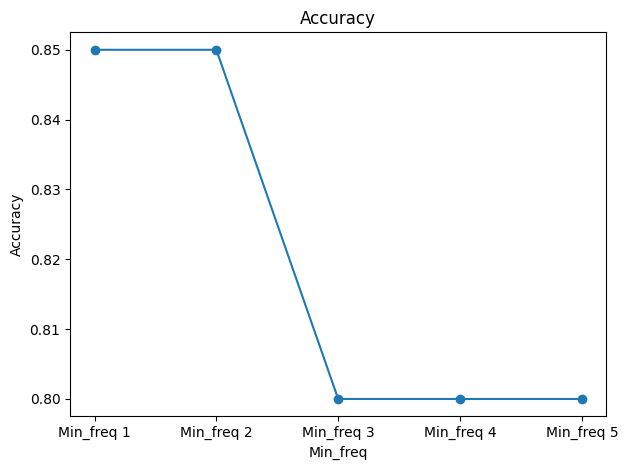

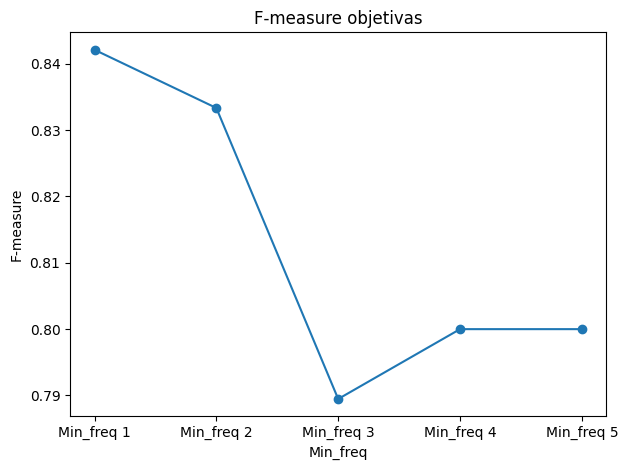

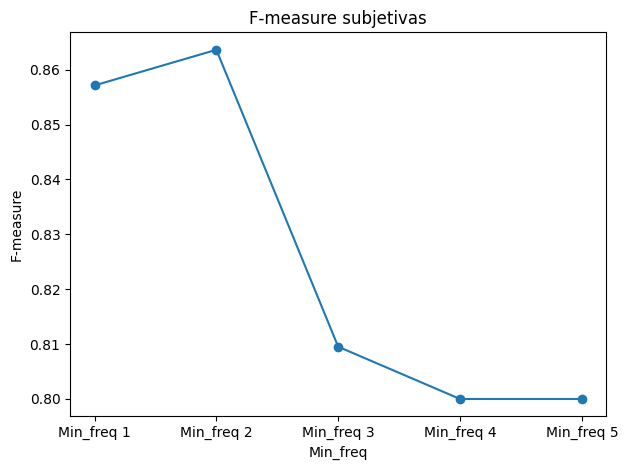

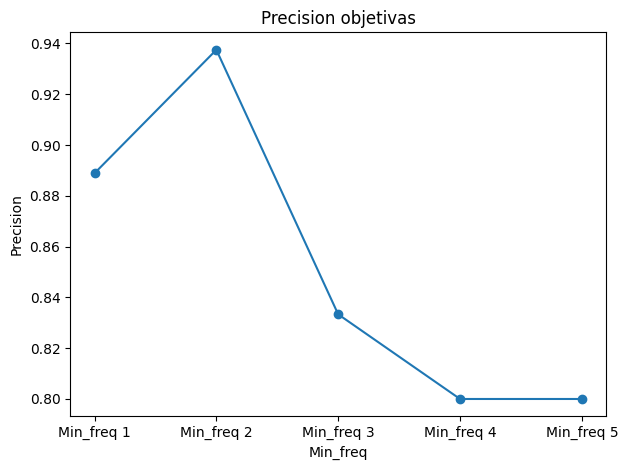

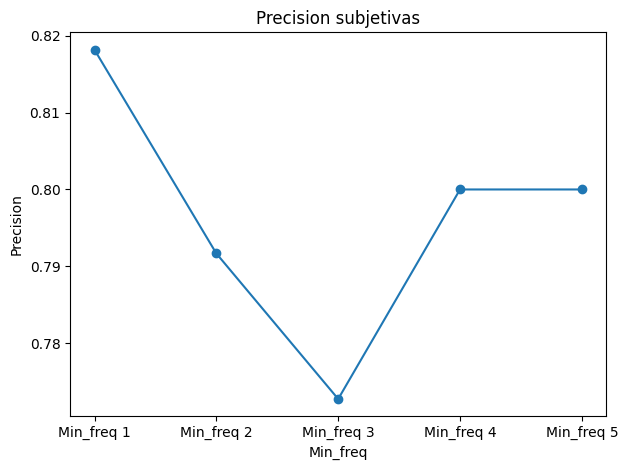

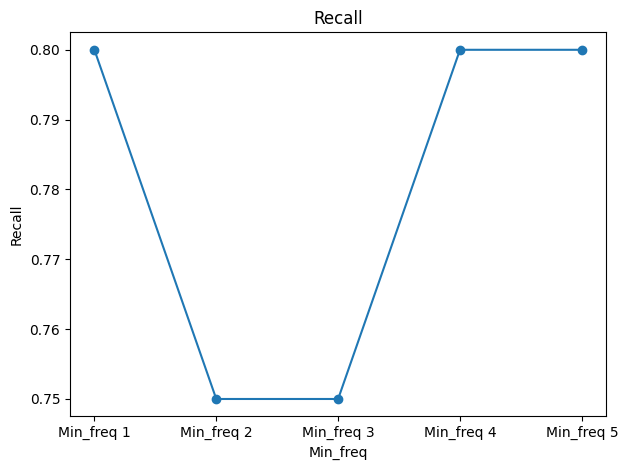

In [ ]:
import matplotlib.pyplot as plt

# Datos de las métricas
accuracy = [0.85, 0.85, 0.8, 0.8, 0.8]
f_measure_obj = [0.8421052631578947, 0.8333333333333334, 0.7894736842105263, 0.8, 0.8]
f_measure_subj = [0.8571428571428572, 0.8636363636363636, 0.8095238095238095, 0.8, 0.8]
precision_obj = [0.8888888888888888, 0.9375, 0.8333333333333334, 0.8, 0.8]
precision_subj = [0.8181818181818182, 0.7916666666666666, 0.7727272727272727, 0.8, 0.8]
recall_obj = [0.8, 0.75, 0.75, 0.8, 0.8]
recall_subj = [0.9, 0.95, 0.85, 0.8, 0.8]

# Accuracy
plt.plot(accuracy, marker='o')
plt.title('Accuracy')
plt.xlabel('Min_freq')
plt.ylabel('Accuracy')
plt.xticks(range(len(accuracy)), [f'Min_freq {i+1}' for i in range(len(accuracy))])
plt.tight_layout()
plt.show()

# F-measure [obj]
plt.plot(f_measure_obj, marker='o')
plt.title('F-measure objetivas')
plt.xlabel('Min_freq')
plt.ylabel('F-measure')
plt.xticks(range(len(f_measure_obj)), [f'Min_freq {i+1}' for i in range(len(f_measure_obj))])
plt.tight_layout()
plt.show()

# F-measure [subj]
plt.plot(f_measure_subj, marker='o')
plt.title('F-measure subjetivas')
plt.xlabel('Min_freq')
plt.ylabel('F-measure')
plt.xticks(range(len(f_measure_subj)), [f'Min_freq {i+1}' for i in range(len(f_measure_subj))])
plt.tight_layout()
plt.show()

# Precision [obj]
plt.plot(precision_obj, marker='o')
plt.title('Precision objetivas')
plt.xlabel('Min_freq')
plt.ylabel('Precision')
plt.xticks(range(len(precision_obj)), [f'Min_freq {i+1}' for i in range(len(precision_obj))])
plt.tight_layout()
plt.show()

# Precision [subj]
plt.plot(precision_subj, marker='o')
plt.title('Precision subjetivas')
plt.xlabel('Min_freq')
plt.ylabel('Precision')
plt.xticks(range(len(precision_subj)), [f'Min_freq {i+1}' for i in range(len(precision_subj))])
plt.tight_layout()
plt.show()

# Recall [obj]
plt.plot(recall_obj, marker='o')
plt.title('Recall')
plt.xlabel('Min_freq')
plt.ylabel('Recall')
plt.xticks(range(len(recall_obj)), [f'Min_freq {i+1}' for i in range(len(recall_obj))])
plt.tight_layout()
plt.show()


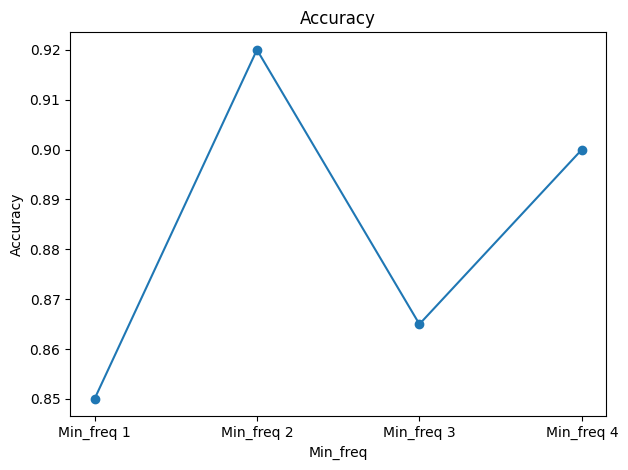

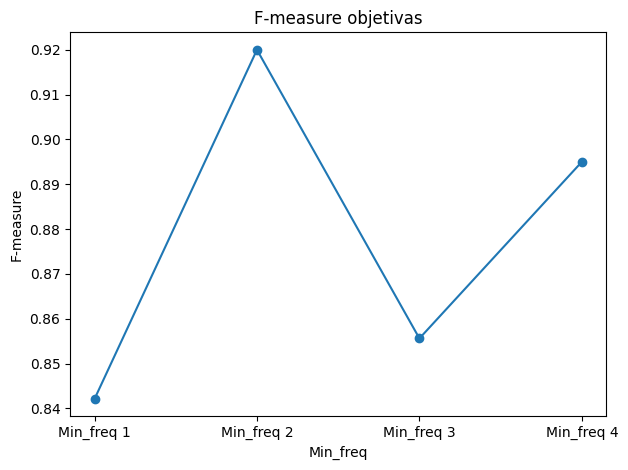

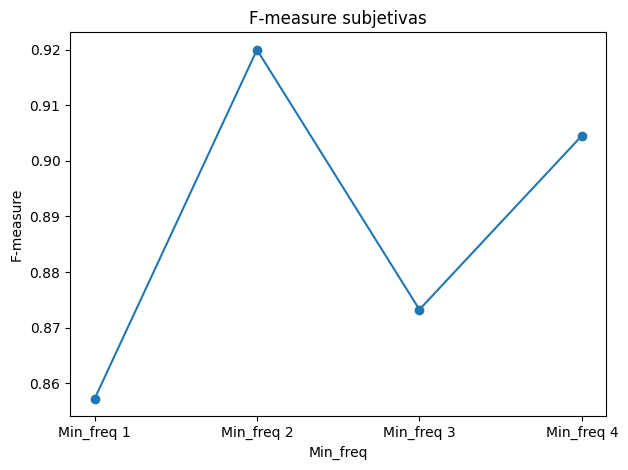

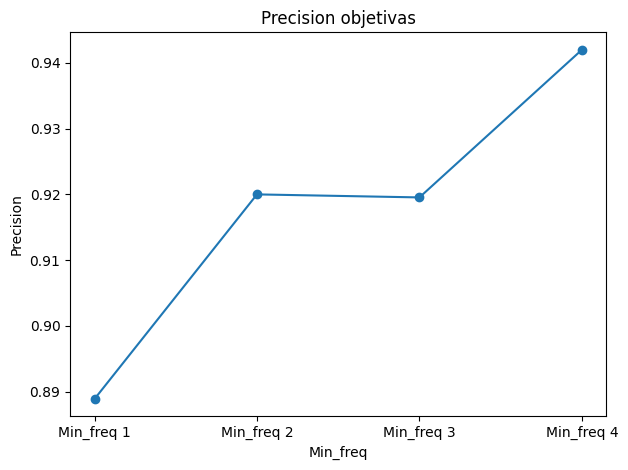

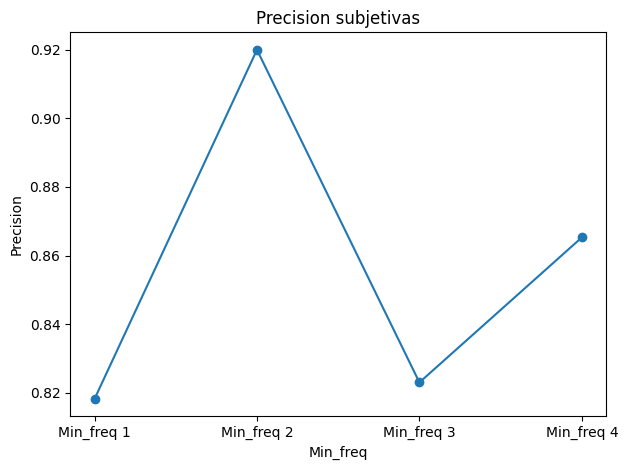

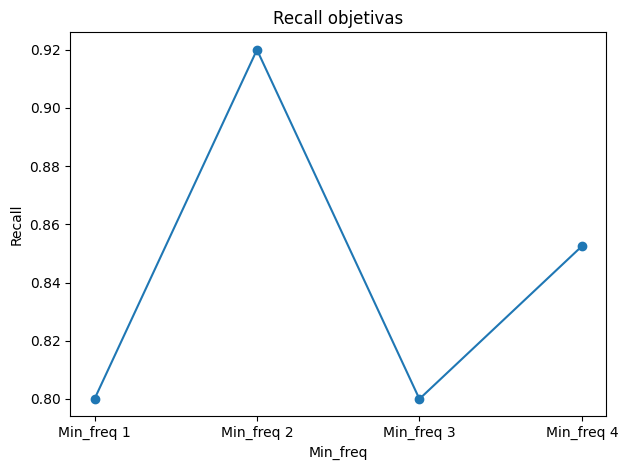

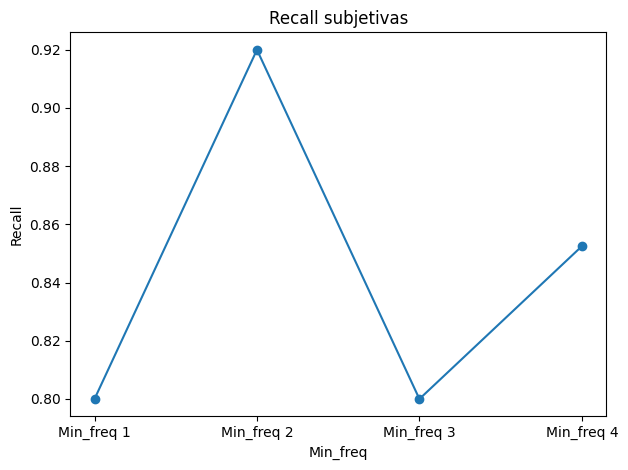

In [ ]:
import matplotlib.pyplot as plt

# Datos de las métricas
accuracy = [0.85, 0.92, 0.865, 0.9]
f_measure_obj = [0.8421052631578947, 0.92, 0.8556149732620321, 0.8950131233595802]
f_measure_subj = [0.8571428571428572, 0.92, 0.8732394366197184, 0.9045346062052505]
precision_obj = [0.8888888888888888, 0.92, 0.9195402298850575, 0.9419889502762431]
precision_subj = [0.8181818181818182, 0.92, 0.8230088495575221, 0.865296803652968]
recall_obj = [0.8, 0.92, 0.8, 0.8525]
recall_subj = [0.9, 0.92, 0.93, 0.9475]

# Accuracy
plt.plot(accuracy, marker='o')
plt.title('Accuracy')
plt.xlabel('Min_freq')
plt.ylabel('Accuracy')
plt.xticks(range(len(accuracy)), [f'Min_freq {i+1}' for i in range(len(accuracy))])
plt.tight_layout()
plt.show()

# F-measure [obj]
plt.plot(f_measure_obj, marker='o')
plt.title('F-measure objetivas')
plt.xlabel('Min_freq')
plt.ylabel('F-measure')
plt.xticks(range(len(f_measure_obj)), [f'Min_freq {i+1}' for i in range(len(f_measure_obj))])
plt.tight_layout()
plt.show()

# F-measure [subj]
plt.plot(f_measure_subj, marker='o')
plt.title('F-measure subjetivas')
plt.xlabel('Min_freq')
plt.ylabel('F-measure')
plt.xticks(range(len(f_measure_subj)), [f'Min_freq {i+1}' for i in range(len(f_measure_subj))])
plt.tight_layout()
plt.show()

# Precision [obj]
plt.plot(precision_obj, marker='o')
plt.title('Precision objetivas')
plt.xlabel('Min_freq')
plt.ylabel('Precision')
plt.xticks(range(len(precision_obj)), [f'Min_freq {i+1}' for i in range(len(precision_obj))])
plt.tight_layout()
plt.show()

# Precision [subj]
plt.plot(precision_subj, marker='o')
plt.title('Precision subjetivas')
plt.xlabel('Min_freq')
plt.ylabel('Precision')
plt.xticks(range(len(precision_subj)), [f'Min_freq {i+1}' for i in range(len(precision_subj))])
plt.tight_layout()
plt.show()

# Recall [obj]
plt.plot(recall_obj, marker='o')
plt.title('Recall objetivas')
plt.xlabel('Min_freq')
plt.ylabel('Recall')
plt.xticks(range(len(recall_obj)), [f'Min_freq {i+1}' for i in range(len(recall_obj))])
plt.tight_layout()
plt.show()

# Recall [subj]
plt.plot(recall_obj, marker='o')
plt.title('Recall subjetivas')
plt.xlabel('Min_freq')
plt.ylabel('Recall')
plt.xticks(range(len(recall_subj)), [f'Min_freq {i+1}' for i in range(len(recall_obj))])
plt.tight_layout()
plt.show()